# LDA using pwdb textual data's noun phrases

### Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import spacy
nlp = spacy.load("en_core_web_sm")

import gensim
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis.gensim_models

from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.topic_visualizer import generate_wordcloud
from sem_covid.services.data_registry import Dataset
from sem_covid.services.sc_wrangling.data_cleaning import clean_text_from_specific_characters, clean_remove_stopwords

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


### Data extraction

In [3]:
pwdb = Dataset.PWDB.fetch()

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100% (1288 of 1288) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


### Concatenate textual data

In [4]:
pwdb_descriptive_data = pwdb['title'].map(str) + ' ' + \
                        pwdb['background_info_description'].map(str) + ' ' + \
                        pwdb['content_of_measure_description'].map(str) + ' ' + \
                        pwdb['use_of_measure_description'] + ' ' + \
                        pwdb['involvement_of_social_partners_description']

pwdb_descriptive_data

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



_id
adc5c75937bc7f7198f534d08b85bd50c9521bfd3f319a090932b5d0bae54de0    Agreement on a teleworking regime During the C...
2372d71eb9ad6e6a70982e02bbe802db004ed49d91b2264c0a2e8e41571002cc    Special protection for COVID-19 risk groups at...
8735e268191e9e5cbd3d2a44ca53d297e31746b5f1e24b941db6225a25848353    Funds for innovative renewable projects in And...
18bcd22116c46919e03a3345f793c3859855227ac942e69dd13cbfcd588e1044    Waiver of advance payments for social and heal...
b94d8aa95fbdeb1bb832b01fbe5d6e9bf9fc36fceb14f7ba370a963f472fe35b    Financial Shield 2.0: Small and medium-sized e...
                                                                                          ...                        
cb014a456b14c3621dd318a12e611f70c2a9636be9fe181072bd4bf5917a40fa    Automatic extension of unemployment benefits D...
d233b17dc2b98f14269c2b22be78d93ec5ccf2a0013b86f09175c69353c5800b    Extra subsidies to institutions in the cultura...
77d7e3c52aaf78bdfb1a1667641db1293bbff862440c547fc3f6

### Remove specific characters

In [5]:
unused_characters = ["\\r", ">", "\n", "\\", "<", "''", "%", "...", "\'", '"', "(", "\n", "*", "1)", "2)", "3)",
                     "[", "]"]
clean_text = clean_text_from_specific_characters(pwdb_descriptive_data, unused_characters)
clean_text = clean_remove_stopwords(clean_text)

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



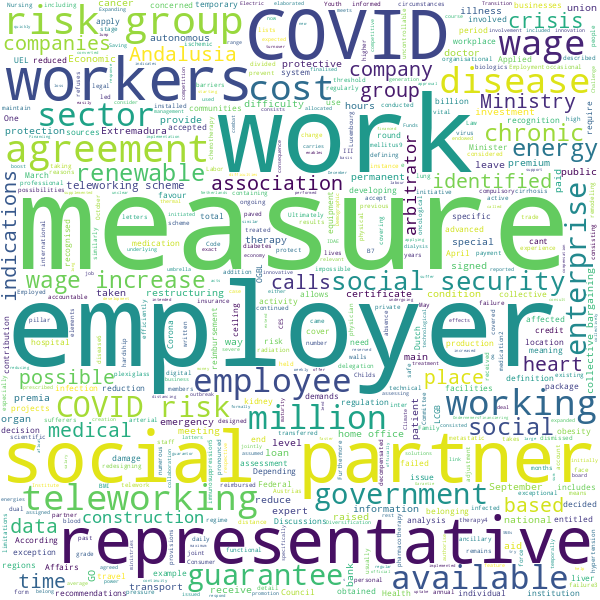

In [6]:
generate_wordcloud(str(clean_text))

### Detect noun phrases

In [7]:
doc = nlp(clean_text)
noun_phrases = [[noun_phrases.text] for noun_phrases in doc.noun_chunks]

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Create Dictionary and corpus

In [8]:
id2word = gensim.corpora.Dictionary(noun_phrases)
corpus = [id2word.doc2bow(text) for text in noun_phrases]

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Train LDA Model

In [9]:
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=7,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha="auto")

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Check the percentage of perplexity and Coherence score

In [10]:
print('Perplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=noun_phrases, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.769504950359413


/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherence Score:  0.8417194471839765


### Visualize the result

In [11]:
pyLDAvis.enable_notebook()
visualize = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds")
visualize


/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.081241 -0.191485       1        1  31.377130
0     -0.065001  0.146543       2        1  15.746319
2     -0.013706  0.012284       3        1  11.011896
1     -0.139846  0.000655       4        1  10.612957
5      0.065087  0.096024       5        1  10.561104
4      0.126674  0.013112       6        1  10.496454
6     -0.054450 -0.077132       7        1  10.194141, topic_info=                            Term      Freq     Total Category  logprob  \
11               social partners  2.000000  2.000000  Default  30.0000   
173                 This measure  2.000000  2.000000  Default  29.0000   
207                        place  1.000000  1.000000  Default  28.0000   
243                   arbitrator  1.000000  1.000000  Default  27.0000   
246          arbitrator decision  1.000000  1.000000  Default  26.0000   
..                           ...       ...       ...      ...      ...   
30   teleworking scheme employer  0.067896  0.813849   Topic7  -6.0797   
95                  organ damage  0.067896  0.813849   Topic7  -6.0797   
192             credit guarantee  0.067896  1.351287   Topic7  -6.0797   
193                        banks  0.067896  1.351287   Topic7  -6.0797   
194                       credit  0.067896  1.351287   Topic7  -6.0797   

     loglift  
11   30.0000  
173  29.0000  
207  28.0000  
243  27.0000  
246  26.0000  
..       ...  
30   -0.2004  
95   -0.2004  
192  -0.7075  
193  -0.7075  
194  -0.7075  

[254 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
137       3  1.033083                                           21 April
138       2  0.960664                                     90,000 workers
212       1  0.740035                                          A company
153       5  1.056577                                          Andalusia
149       6  0.721824                              Andalusia Extremadura
...     ...       ...                                                ...
221       1  0.740035                                         wage costs
216       1  0.740035  wage loss financed temporary reduction employe...
211       1  0.910213                                      working hours
156       7  1.053293   €124.3 million Andalusia €12 million Extremadura
252       4  0.855140                                       €500 workers

[126 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 6, 5, 7])

/home/daycu/Work/sem-covid/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

